<a href="https://colab.research.google.com/github/glnrzr/TezCalismasi/blob/master/Derin%20%C3%96%C4%9Frenme%20ile%20Konu%20Tahmini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd


In [4]:
dataset = pd.read_excel('/content/drive/My Drive/uygulama/topic_modeling_colab.xlsx')

In [5]:
dataset.head()


,Class,Unnamed: 1,Text
0,government,B-PERSON I-PERSON O B-LOCATION O B-MISC O,"Corina Casanova , İsviçre Federal Şansölyesidir ."
1,government,B-PERSON I-PERSON O B-MISC O O,Corina Casanova bir federal parlementerdir .
2,government,B-ORGANIZATION I-ORGANIZATION I-ORGANIZATION O...,"İsviçre Dışişleri Bakanlığı , İsviçre federal ..."
3,government,B-LOCATION O O O O O,İsviçre'nin dış ilişkilerini sürdürmekle görev...
4,government,B-MISC B-PERSON O O O O O O O O O O B-PERSON O...,"Başbakan Milan Hoda , Südet Almanlarını yatışt..."


In [6]:
dataset = dataset.drop(['Unnamed: 1'], axis=1)

In [7]:
dataset.head()

,Class,Text
0,government,"Corina Casanova , İsviçre Federal Şansölyesidir ."
1,government,Corina Casanova bir federal parlementerdir .
2,government,"İsviçre Dışişleri Bakanlığı , İsviçre federal ..."
3,government,İsviçre'nin dış ilişkilerini sürdürmekle görev...
4,government,"Başbakan Milan Hoda , Südet Almanlarını yatışt..."


In [8]:
dataset.describe()

,Class,Text
count,533182,533182
unique,25,532583
top,people,2010 FIFA Dünya Kupası'ndaki maçlara ev sahipl...
freq,128929,3


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


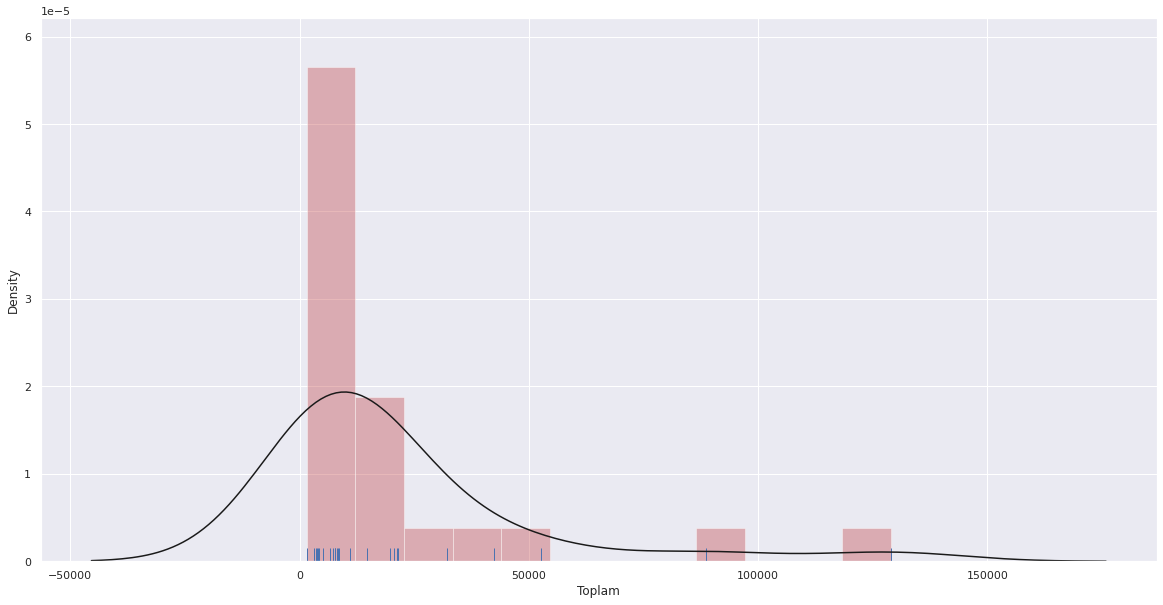

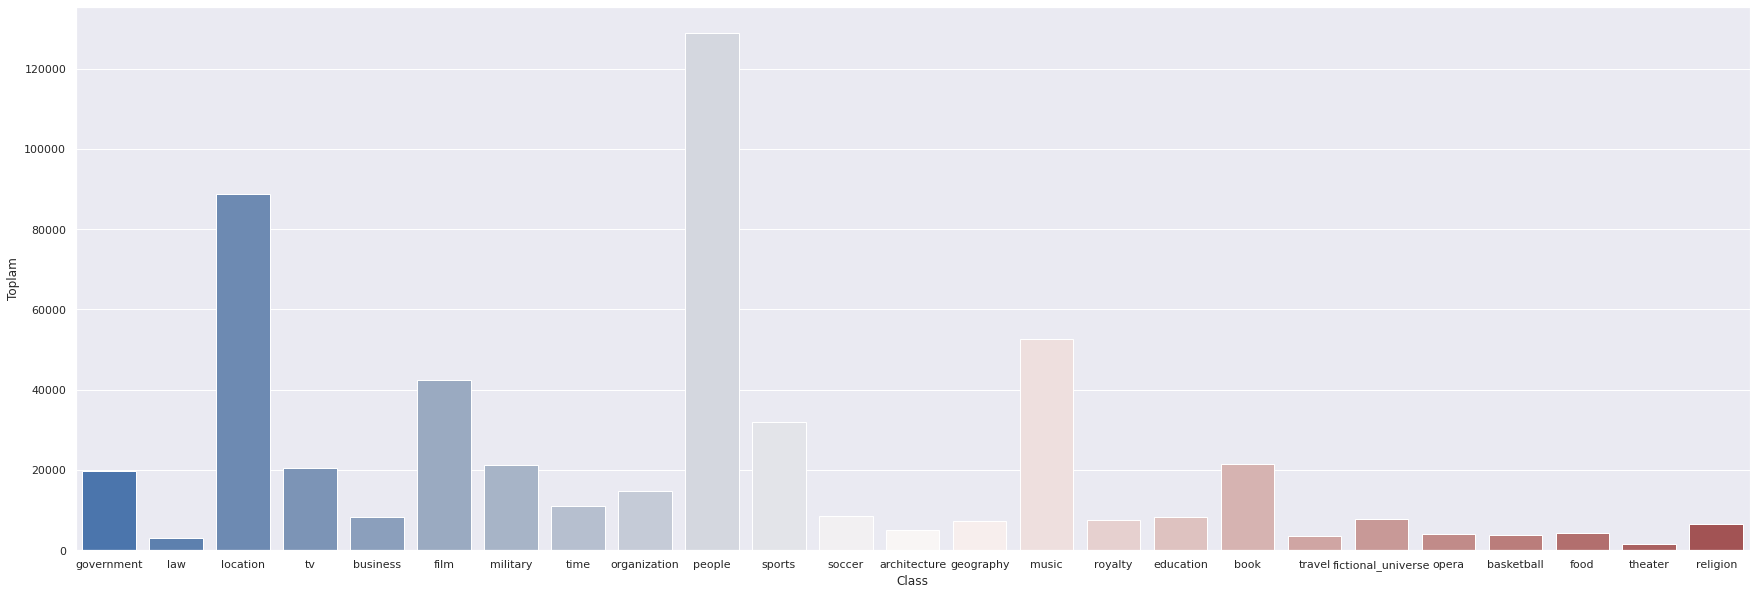

In [9]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
sum_ = Counter(dataset['Class']).values()
class_ = Counter(dataset['Class']).keys()
df_class = pd.DataFrame(zip(class_,sum_), columns = ['Class', 'Toplam'])
plt.figure(figsize=(20,10))
sns.set(color_codes=True)
sns.distplot(df_class.Toplam,rug = True, kde_kws={"color": "k"}, hist_kws={"color" : "r"});
plt.savefig('/content/drive/My Drive/uygulama/sınıfdagilim2.png')
plt.figure(figsize=(30,10))
sns.set(color_codes=True)
#sns.lineplot(x = "Class", y = "Toplam", data = df_class, ax = ax[0,0]);
sns.barplot(x = "Class", y = "Toplam", data = df_class, palette="vlag")
plt.savefig('/content/drive/My Drive/uygulama/sınıfdagılım.png')

In [11]:
dataset['Text'] = dataset['Text'].apply(lambda x: x.lower())

In [13]:
dataset['Text'] = dataset['Text'].apply(lambda x: .sub("[,'\.!?();:$%&#]", '', x))

AttributeError: ignored

In [14]:

dataset['Text'] = dataset['Text'].apply(lambda x: x.strip())
import nltk
nltk.download('stopwords')
WPT = nltk.WordPunctTokenizer()
stop_word_list = nltk.corpus.stopwords.words('turkish')
def stopword_extraction(values):
    wordFilter = [word for word in values.split() if word not in stop_word_list]
    notStopword = " ".join(wordFilter)
    return notStopword
 
dataset['Text'] = dataset['Text'].apply(lambda x: stopword_extraction(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
dataset.head()

,Class,Text
0,government,"corina casanova , i̇sviçre federal şansölyesid..."
1,government,corina casanova bir federal parlementerdir .
2,government,"i̇sviçre dışişleri bakanlığı , i̇sviçre federa..."
3,government,i̇sviçre'nin dış ilişkilerini sürdürmekle göre...
4,government,"başbakan milan hoda , südet almanlarını yatışt..."


In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(dataset.Text)

In [18]:
import numpy as np
num_tokens = [len(tokens) for tokens in dataset['Text']]
num_tokens = np.array(num_tokens)
max_tokens = np.mean(num_tokens) + 2 * np.std(num_tokens)
max_tokens = int(max_tokens)

In [19]:
X = tokenizer.texts_to_sequences(dataset['Text'])
X_pad = pad_sequences(X, maxlen=max_tokens)

In [20]:
Y = pd.get_dummies(dataset['Class']).values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_pad, Y, test_size = 0.25, random_state = 42)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Embedding,LSTM, Dropout
from keras.optimizers import Adam
num_labes = len(dataset.Class.unique())
embedding_size = max_tokens
model = Sequential()
model.add(Embedding(input_dim=10000,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))
model.add(LSTM(units=128,dropout = 0.2, return_sequences=True))
model.add(LSTM(units=128,dropout = 0.2, return_sequences=False))
model.add(Dense(num_labes, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 325, 325)          3250000   
_________________________________________________________________
lstm (LSTM)                  (None, 325, 128)          232448    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 25)                3225      
Total params: 3,617,257
Trainable params: 3,617,257
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, validation_split=0.20, epochs=20,batch_size=1024)

Epoch 1/20
137/313 [============>.................] - ETA: 57:44 - loss: 2.5702 - accuracy: 0.2759

In [ ]:
loss, acc = model.evaluate(x_test, y_test)
print(loss,acc)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0, sampling_strategy = "majority")
x_rus, y_rus = rus.fit_resample(X_pad, Y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size = 0.25, random_state = 42)

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=10000,
                    output_dim=embedding_size,
                    input_length=max_tokens,
                    name='embedding_layer'))
model2.add(LSTM(units=128,dropout = 0.2, return_sequences=True))
model2.add(LSTM(units=128,dropout = 0.2, return_sequences=False))
model2.add(Dense(num_labes, activation = 'softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])
model2.summary()

In [ ]:
history2 = model2.fit(x_train, y_train, validation_split=0.20, epochs=20,batch_size=1024)

In [ ]:
loss2, acc2 = model2.evaluate(x_test, y_test)
print("loss 2 : {}, acc 2 : {}".format(loss2,acc2))

In [ ]:
plt.figure(figsize = (15,10))
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train2', 'Test2','Train1', 'Test1'], loc='upper left')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [ ]:
from keras.utils import plot_model, model_to_dot
plot_model(model2, show_shapes=True)

In [ ]:
y_pred2 = model2.predict_classes(x_test,batch_size=1024, verbose=0)
rounded_labels2=np.argmax(y_test, axis=1)
cm2 = confusion_matrix(rounded_labels2, y_pred2)
plt.figure(figsize=(35,15))
df2 = pd.DataFrame(cm2, columns=np.unique(dataset['Class']),index=np.unique(dataset['Class']))
sns.set(font_scale=1.2)
sns.heatmap(df2, annot=True, annot_kws={'size': 16});